In [1]:
import os
import pickle
import csv
from PIL import Image
import math

import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from sklearn.utils import shuffle

print('All modules imported.')

All modules imported.


# 1 Load the data

In [2]:
# Load pickled data
training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"
signname_file = "./signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signname_file) as f:
    f.readline() # skip the headers
    signnames = [row[1] for row in csv.reader(f)]

# The images' pixels in [0, 255]
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# 2 Dataset Summary & Exploration

### Summary

In [3]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = (X_train.shape[1], X_train.shape[2])
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### An exploratory visualization of the dataset

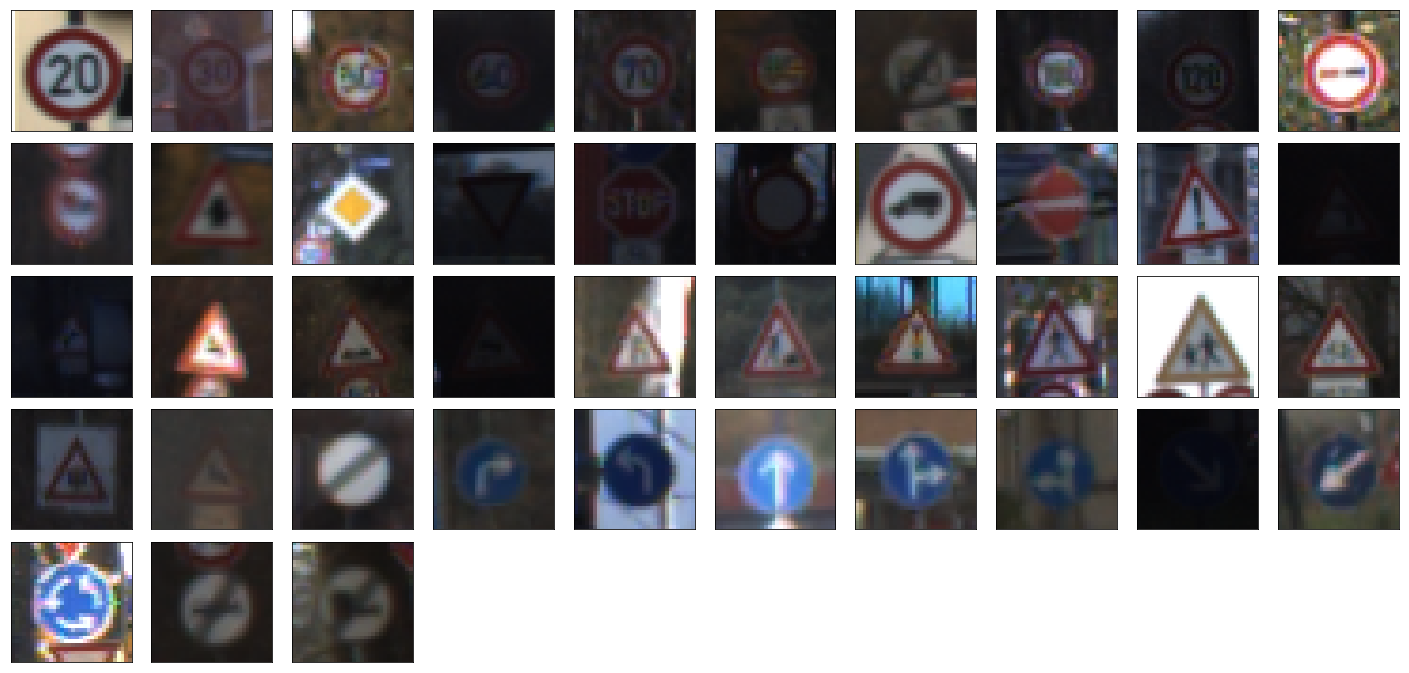

In [49]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show onw figure for each traffic sign
plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace = .1, wspace=.1)
for i in range(0, n_classes):
    index = np.where(y_train==i)[0][0]
    image = X_train[index]
    plt.subplot(5, 10, i + 1), plt.imshow(image)
    plt.xticks([]), plt.yticks([])
plt.savefig('./exploratory.jpg')

### The distribution of training, validation and testing set

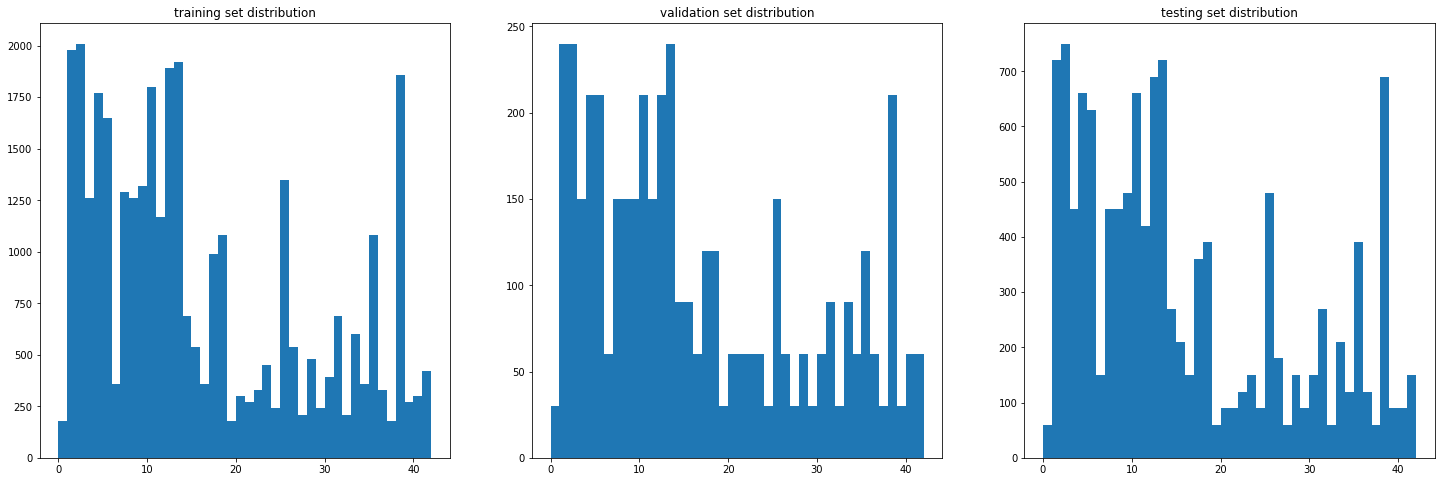

In [50]:
# Show hisgrom of the number of each traffic sign

fig, axes = plt.subplots(1, 3 ,figsize=(25, 8))
axes[0].hist(y_train, bins=range(0, n_classes))
axes[0].set_title('training set distribution')
axes[1].hist(y_valid, bins=range(0, n_classes))
axes[1].set_title('validation set distribution')
axes[2].hist(y_test, bins=range(0, n_classes))
axes[2].set_title('testing set distribution')

# plt.savefig('./distribution.jpg')

# 3 Pre-process the Data Set

In [90]:
def normalize(image_set):
    return image_set.astype(np.float32) / 128. - 1.

# RGB2YCrCb?
def rgb2gray(image_set):
    new_set = np.array([])
    for img in image_set:
        np.append(new_set, cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return new_set

X_train =  normalize(X_train)
X_valid =  normalize(X_valid)
X_test =  normalize(X_test)

# X_train = rgb2gray(X_train)
# X_valid = rgb2gray(X_valid)
# X_test = rgb2gray(X_test)

print(X_train.shape, X_train.dtype)
print(X_valid.shape, X_valid.dtype)
print(X_test.shape, X_test.dtype)

(34799, 32, 32, 3) float32
(4410, 32, 32, 3) float32
(12630, 32, 32, 3) float32


# 4 Save the preprocessed dataset

In [91]:
# Save the data for easy access
pickle_file = './pre-traffic-signs-data/pre-data.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_features': X_train,
                    'train_labels': y_train,
                    'valid_features': X_valid,
                    'valid_labels': y_valid,
                    'test_features': X_test,
                    'test_labels': y_test,
                    'signnames': signnames,
                },
                pfile, protocol=2)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.
